In [1]:
# Importing libraries
import pandas as pd
import numpy as np

# Loading the transaction dataframe
transaction_df = pd.read_excel(r"C:\Users\jvrdo\Downloads\QVI_transaction_data.xlsx", sheet_name="in")

# First look into transaction df
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [2]:
# Inspecting the shape of transaction dataframe
transaction_df.shape

# We can see that our transaction dataframe has 264836 rows and 8 columns

(264836, 8)

In [3]:
# Checking for missing values
transaction_df.isna().sum()
# We can see that transaction_df has no missing values

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [4]:
# Getting summary stats from transaction data
print(transaction_df.describe())

# Checking data types
transaction_df.dtypes

# Excluding string data, so that we can perform data cleaning
product_name = transaction_df[["PROD_NAME"]]

product_name

# Dropping string data
transaction_df.drop("PROD_NAME", axis=1,inplace=True)



                DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.057998e+04  7.813303e+04   
min     43282.000000       1.00000    1.000000e+03  1.000000e+00   
25%     43373.000000      70.00000    7.002100e+04  6.760150e+04   
50%     43464.000000     130.00000    1.303575e+05  1.351375e+05   
75%     43555.000000     203.00000    2.030942e+05  2.027012e+05   
max     43646.000000     272.00000    2.373711e+06  2.415841e+06   

            PROD_NBR       PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  264836.000000  
mean       56.583157       1.907309       7.304200  
std        32.826638       0.643654       3.083226  
min         1.000000       1.000000       1.500000  
25%        28.000000       2.000000       5.400000  
50%        56.000000       2.000000       7.400000  
75%        85.00

In [5]:
transaction_df.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,2,6.0
1,43599,1,1307,348,66,3,6.3
2,43605,1,1343,383,61,2,2.9
3,43329,2,2373,974,69,5,15.0
4,43330,2,2426,1038,108,3,13.8


In [6]:
# Based on summary stats information, it seems that MAX value of 200 in product quantity might be an erroneus outlier, 
# since the mean is 1.907, and median 2. The same can be said for Total Sales.
# Therefore we will remove the following outliers
cols = ["DATE", "STORE_NBR", "LYLTY_CARD_NBR", "TXN_ID", "PROD_NBR", "PROD_QTY", "TOT_SALES"]

# IQR
Q1 = np.percentile(transaction_df[cols], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(transaction_df[cols], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = np.where(transaction_df[cols] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(transaction_df[cols] <= (Q1-1.5*IQR))

# Removing the outliers
transaction_df.drop(upper[0], inplace = True)
transaction_df.drop(lower[0], inplace = True)

# Checking the shape of df
transaction_df.shape

(106823, 7)

In [7]:
product_name

transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,2,6.0
1,43599,1,1307,348,66,3,6.3
2,43605,1,1343,383,61,2,2.9
3,43329,2,2373,974,69,5,15.0
4,43330,2,2426,1038,108,3,13.8


In [8]:
#split name column into two columns
product_name.dtypes

product_name["size"] = product_name["PROD_NAME"].str.extract('(\d+)').astype(int)

product_name

<ipython-input-8-3e6d57866090>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_name["size"] = product_name["PROD_NAME"].str.extract('(\d+)').astype(int)


,PROD_NAME,size
0,Natural Chip Compny SeaSalt175g,175
1,CCs Nacho Cheese 175g,175
2,Smiths Crinkle Cut Chips Chicken 170g,170
3,Smiths Chip Thinly S/Cream&Onion 175g,175
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150
...,...,...
264831,Kettle Sweet Chilli And Sour Cream 175g,175
264832,Tostitos Splash Of Lime 175g,175
264833,Doritos Mexicana 170g,170
264834,Doritos Corn Chip Mexican Jalapeno 150g,150


In [9]:
product_name.dtypes

product_name["PROD_NBR"] = transaction_df["PROD_NBR"]

product_name

<ipython-input-9-b2088bf3a0a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_name["PROD_NBR"] = transaction_df["PROD_NBR"]


,PROD_NAME,size,PROD_NBR
0,Natural Chip Compny SeaSalt175g,175,5.0
1,CCs Nacho Cheese 175g,175,66.0
2,Smiths Crinkle Cut Chips Chicken 170g,170,61.0
3,Smiths Chip Thinly S/Cream&Onion 175g,175,69.0
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150,108.0
...,...,...,...
264831,Kettle Sweet Chilli And Sour Cream 175g,175,NaN
264832,Tostitos Splash Of Lime 175g,175,NaN
264833,Doritos Mexicana 170g,170,NaN
264834,Doritos Corn Chip Mexican Jalapeno 150g,150,NaN


In [10]:
transaction_df["product_size"] = product_name["size"]

transaction_df["product_name"] = product_name["PROD_NAME"]

In [12]:
transaction_df['product_name'] = transaction_df.apply(lambda x: x['product_name'][:-4], axis = 1)

In [13]:
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,product_size,product_name
0,43390,1,1000,1,5,2,6.0,175,Natural Chip Compny SeaSalt
1,43599,1,1307,348,66,3,6.3,175,CCs Nacho Cheese
2,43605,1,1343,383,61,2,2.9,170,Smiths Crinkle Cut Chips Chicken
3,43329,2,2373,974,69,5,15.0,175,Smiths Chip Thinly S/Cream&Onion
4,43330,2,2426,1038,108,3,13.8,150,Kettle Tortilla ChpsHny&Jlpno Chili
...,...,...,...,...,...,...,...,...,...
263916,43303,77,77238,75162,56,1,2.1,125,Cheezels Cheese Box
263922,43371,77,77130,75055,83,2,3.8,200,WW D/Style Chip Sea Salt
263924,43361,77,77099,75018,64,2,5.4,150,Red Rock Deli SR Salsa & Mzzrlla
263930,43310,77,77238,75163,13,2,5.4,150,Red Rock Deli Thai Chilli&Lime


In [14]:
# Now we will perform some feature engineering, for example create a column for price per chip
transaction_df["price/chip"] = transaction_df["TOT_SALES"] / transaction_df["PROD_QTY"]


In [15]:
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,product_size,product_name,price/chip
0,43390,1,1000,1,5,2,6.0,175,Natural Chip Compny SeaSalt,3.00
1,43599,1,1307,348,66,3,6.3,175,CCs Nacho Cheese,2.10
2,43605,1,1343,383,61,2,2.9,170,Smiths Crinkle Cut Chips Chicken,1.45
3,43329,2,2373,974,69,5,15.0,175,Smiths Chip Thinly S/Cream&Onion,3.00
4,43330,2,2426,1038,108,3,13.8,150,Kettle Tortilla ChpsHny&Jlpno Chili,4.60
...,...,...,...,...,...,...,...,...,...,...
263916,43303,77,77238,75162,56,1,2.1,125,Cheezels Cheese Box,2.10
263922,43371,77,77130,75055,83,2,3.8,200,WW D/Style Chip Sea Salt,1.90
263924,43361,77,77099,75018,64,2,5.4,150,Red Rock Deli SR Salsa & Mzzrlla,2.70
263930,43310,77,77238,75163,13,2,5.4,150,Red Rock Deli Thai Chilli&Lime,2.70


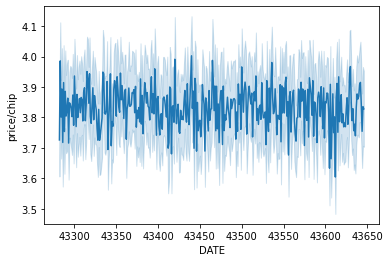

In [16]:
# Now we will explore if the customers are spending more per chip packet over time?
import matplotlib.pyplot as plt
import seaborn as sns

chip_t = sns.lineplot(data=transaction_df, x="DATE", y="price/chip")

# We can see the variations in chips price, but there was no significant change over given time

In [17]:
transaction_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,product_size,price/chip
count,106823.000000,106823.000000,106823.00000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000
mean,43463.905807,56.484193,56646.00968,54541.781021,56.485317,1.909018,7.330500,182.492469,3.833415
std,105.497304,30.833978,30824.00853,31479.402984,32.781703,0.340799,2.524977,64.361954,1.107692
min,43282.000000,1.000000,1000.00000,1.000000,1.000000,1.000000,1.500000,70.000000,1.320000
25%,43372.000000,30.000000,30131.00000,27295.500000,28.000000,2.000000,5.600000,150.000000,3.000000
50%,43464.000000,58.000000,58384.00000,54521.000000,56.000000,2.000000,7.400000,170.000000,3.800000
75%,43555.000000,82.000000,82318.00000,81824.500000,85.000000,2.000000,9.200000,175.000000,4.600000
max,43646.000000,155.000000,107123.00000,109047.000000,114.000000,5.000000,29.500000,380.000000,6.500000


[Text(0.5, 0, 'Product quantity')]

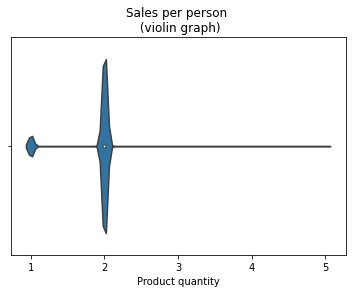

In [18]:
# By looking into chip pack sale quantity, we can see that most buyers buy at least 2 bags of chips.

box_sale = sns.violinplot(data=transaction_df, x="PROD_QTY")
plt.title("Sales per person \n (violin graph)")
box_sale.set(xlabel="Product quantity")

In [19]:
# Loading the purchase behavior dataframe
behavior_df = pd.read_csv(r"C:\Users\jvrdo\Downloads\QVI_purchase_behaviour.csv")

# First look into transaction df
print(behavior_df.head())

# Look into shape of behavior_df
behavior_df.shape

# Checking for missing values
print(behavior_df.isna().sum())

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [20]:
# Merging behavior and transaction dataframes
merged = pd.merge(transaction_df, behavior_df, on="LYLTY_CARD_NBR", how="left")

In [21]:
merged.head(50)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,product_size,product_name,price/chip,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,2,6.00,175,Natural Chip Compny SeaSalt,3.00,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,3,6.30,175,CCs Nacho Cheese,2.10,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,2,2.90,170,Smiths Crinkle Cut Chips Chicken,1.45,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,5,15.00,175,Smiths Chip Thinly S/Cream&Onion,3.00,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,3,13.80,150,Kettle Tortilla ChpsHny&Jlpno Chili,4.60,MIDAGE SINGLES/COUPLES,Budget
5,43604,4,4074,2982,57,1,5.10,300,Old El Paso Salsa Dip Tomato Mild,5.10,MIDAGE SINGLES/COUPLES,Budget
6,43601,4,4149,3333,16,1,5.70,330,Smiths Crinkle Chips Salt & Vinegar,5.70,MIDAGE SINGLES/COUPLES,Budget
7,43601,4,4196,3539,24,1,3.60,210,Grain Waves Sweet Chilli,3.60,MIDAGE SINGLES/COUPLES,Budget
8,43332,5,5026,4525,42,1,3.90,150,Doritos Corn Chip Mexican Jalapeno,3.90,MIDAGE SINGLES/COUPLES,Budget
9,43330,7,7150,6900,52,2,7.20,210,Grain Waves Sour Cream&Chives,3.60,MIDAGE SINGLES/COUPLES,Budget


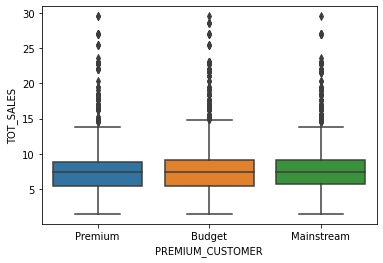

In [22]:
# Looking into the relationship between customer rating and total sales
ax = sns.boxplot(data=merged, x="PREMIUM_CUSTOMER", y="TOT_SALES")



By looking at boxplot data, there is no clear difference between customer types

In [23]:
# Checking the significance by performing statistical test (ANOVA)
import scipy.stats as stats
Premium = merged[merged["PREMIUM_CUSTOMER"] == "Premium"]["TOT_SALES"]
Budget = merged[merged["PREMIUM_CUSTOMER"] == "Budget"]["TOT_SALES"]
Mainstream = merged[merged["PREMIUM_CUSTOMER"] == "Mainstream"]["TOT_SALES"]
fvalue, pvalue = stats.f_oneway(Premium, Budget, Mainstream)

In [24]:
print(fvalue, pvalue)

20.232066383904105 1.6405482861251542e-09


Since ANOVA test has shown a significant difference between the groups, we will perform a "Post-hoc"-Tukey test to see
 which groups are different

In [25]:
# Performing a post-hoc test
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=merged, res_var='TOT_SALES', xfac_var='PREMIUM_CUSTOMER', anova_model='TOT_SALES ~ C(PREMIUM_CUSTOMER)')
res.tukey_summary

ModuleNotFoundError: No module named 'bioinfokit'

From the Tukey test, we can discern that there are significant differences between the Premium and Mainstream group,
 as well as between the Budget and Mainstream group. Whereas there was no difference between Premium/Budget groups.

In [26]:
# Checking the mean sales per customer group
merged.groupby("PREMIUM_CUSTOMER")["TOT_SALES"].mean()

PREMIUM_CUSTOMER
Budget        7.291909
Mainstream    7.392613
Premium       7.291265
Name: TOT_SALES, dtype: float64

In [27]:
# Checking the median sales per customer group
merged.groupby("PREMIUM_CUSTOMER")["TOT_SALES"].median()

PREMIUM_CUSTOMER
Budget        7.4
Mainstream    7.4
Premium       7.4
Name: TOT_SALES, dtype: float64

By looking into mean total sales data, we can ascertain how Mainstream customers spend the most. But, when we look into the median sales, there are no differences. To decide if we are going to use mean or median, we must see if our data is normally distributed.

<AxesSubplot:>

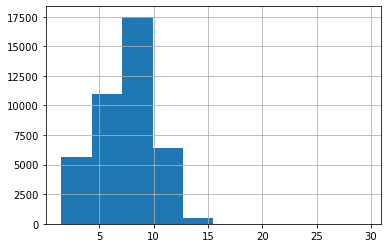

In [28]:
Mainstream.hist()

<AxesSubplot:>

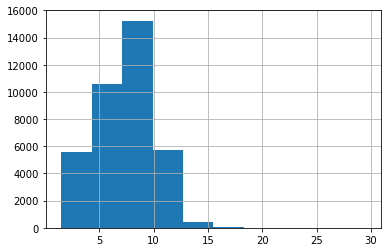

In [29]:
Budget.hist()

<AxesSubplot:>

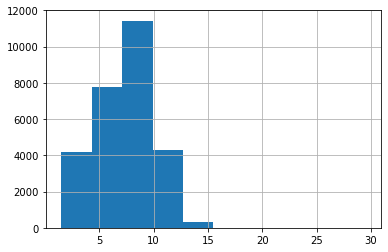

In [30]:
Premium.hist()

From the histograms above, we can see how "total sales" data is not normally distributed, hence we will use median to compare the groups, and conclude that the median sales are equal between the groups.

[Text(0, 0.5, 'Product quantity'), Text(0.5, 0, 'Customer class')]

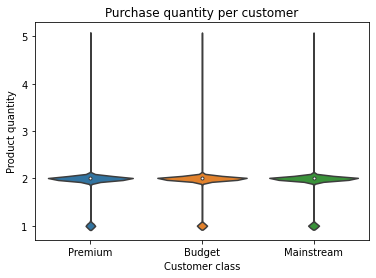

In [31]:
# Looking into the relationship between customer rating and sale quantity
ax = sns.violinplot(data=merged, x="PREMIUM_CUSTOMER", y="PROD_QTY")
plt.title("Purchase quantity per customer")
ax.set(ylabel= "Product quantity", xlabel= "Customer class")

In [32]:
# Checking the average chip price per customer group
merged.groupby("PREMIUM_CUSTOMER")["price/chip"].mean()

PREMIUM_CUSTOMER
Budget        3.804559
Mainstream    3.877184
Premium       3.807995
Name: price/chip, dtype: float64

In [67]:
# Checking the significance of the above difference by running ANOVA test
Premium_chip = merged[merged["PREMIUM_CUSTOMER"] == "Premium"]["price/chip"]
Budget_chip = merged[merged["PREMIUM_CUSTOMER"] == "Budget"]["price/chip"]
Mainstream_chip = merged[merged["PREMIUM_CUSTOMER"] == "Mainstream"]["price/chip"]
fvalue, pvalue = stats.f_oneway(Premium, Budget, Mainstream)
print(fvalue, pvalue)

20.232066383904105 1.6405482861251542e-09


In all customer groups, the most common purchase quantity is two bags of chips. While, the Mainstream group pays the most per
a bag of chips. (P< 0.05)

In [33]:
# Checking the mean sales per lifestage
lifestage_mean_sales = merged.groupby("LIFESTAGE")["TOT_SALES"].mean()

lifestage_mean_sales.sort_values()

LIFESTAGE
YOUNG SINGLES/COUPLES     7.181695
OLDER FAMILIES            7.279561
YOUNG FAMILIES            7.294674
NEW FAMILIES              7.353521
OLDER SINGLES/COUPLES     7.372160
MIDAGE SINGLES/COUPLES    7.401755
RETIREES                  7.437524
Name: TOT_SALES, dtype: float64

In [34]:
# Counting the num of customers in each lifestage
merged["LIFESTAGE"].value_counts()

OLDER SINGLES/COUPLES     22103
OLDER FAMILIES            20121
RETIREES                  19798
YOUNG FAMILIES            17395
YOUNG SINGLES/COUPLES     14578
MIDAGE SINGLES/COUPLES    10002
NEW FAMILIES               2826
Name: LIFESTAGE, dtype: int64

From the data above, we can see how retirees make the most total chip sales, seconded by midage singles/couples.

In [35]:
# Counting the num of customers in each customer rating group
merged["PREMIUM_CUSTOMER"].value_counts()

Mainstream    41115
Budget        37624
Premium       28084
Name: PREMIUM_CUSTOMER, dtype: int64

In [36]:
merged.head(60)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,product_size,product_name,price/chip,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,2,6.00,175,Natural Chip Compny SeaSalt,3.00,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,3,6.30,175,CCs Nacho Cheese,2.10,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,2,2.90,170,Smiths Crinkle Cut Chips Chicken,1.45,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,5,15.00,175,Smiths Chip Thinly S/Cream&Onion,3.00,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,3,13.80,150,Kettle Tortilla ChpsHny&Jlpno Chili,4.60,MIDAGE SINGLES/COUPLES,Budget
5,43604,4,4074,2982,57,1,5.10,300,Old El Paso Salsa Dip Tomato Mild,5.10,MIDAGE SINGLES/COUPLES,Budget
6,43601,4,4149,3333,16,1,5.70,330,Smiths Crinkle Chips Salt & Vinegar,5.70,MIDAGE SINGLES/COUPLES,Budget
7,43601,4,4196,3539,24,1,3.60,210,Grain Waves Sweet Chilli,3.60,MIDAGE SINGLES/COUPLES,Budget
8,43332,5,5026,4525,42,1,3.90,150,Doritos Corn Chip Mexican Jalapeno,3.90,MIDAGE SINGLES/COUPLES,Budget
9,43330,7,7150,6900,52,2,7.20,210,Grain Waves Sour Cream&Chives,3.60,MIDAGE SINGLES/COUPLES,Budget


In [37]:
sale_prod = merged.groupby("product_name")["TOT_SALES"].sum()
sale_prod

product_name
Burger Rings                          2762.3
CCs Nacho Cheese                      2457.0
CCs Original                          2272.2
CCs Tasty Cheese                      2396.1
Cheetos Chs & Bacon Balls             3969.9
                                       ...  
WW Sour Cream &OnionStacked Chips     2105.2
WW Supreme Cheese   Corn Chips        2008.3
Woolworths Cheese   Rings             2075.4
Woolworths Medium   Salsa             1530.0
Woolworths Mild     Salsa             1752.0
Name: TOT_SALES, Length: 114, dtype: float64

In [38]:
# Subsetting by brand
Woolworths = merged["product_name"].str.contains("Woolworths")

Wool_sales = merged[Woolworths]["TOT_SALES"].sum()
print("Woolworhts total sales: {} ".format(Wool_sales))

Woolworhts total sales: 5357.4 


In [39]:
CCs = merged["product_name"].str.contains("CCs")

cc_sales = merged[CCs]["TOT_SALES"].sum()

print("CCs total sales: {} ".format(cc_sales))

CCs total sales: 7125.300000000002 


In [40]:
WW = merged["product_name"].str.contains("WW")

WW_sales = merged[WW]["TOT_SALES"].sum()


# Since both WW and Woolworths are actually Woolworths sales we will add them up

Wool_total = Wool_sales + WW_sales

print("WW total sales: {} ".format(Wool_total))

WW total sales: 19543.1 


In [41]:
Cheetos = merged["product_name"].str.contains("Cheetos")

cheetos_sales = merged[Cheetos]["TOT_SALES"].sum()

print("Cheetos total sales: {} ".format(cheetos_sales))

Cheetos total sales: 6949.1 


In [43]:
# We will create a function for the process above
def sales_by_brand(name):
    mask = merged["product_name"].str.contains(name)
    sales = merged[mask]["TOT_SALES"].sum()
    print ("{} total sales: {} ".format(name,sales))
    return sales

In [44]:
Smiths = sales_by_brand("Smiths")

Smiths total sales: 84485.7 


In [45]:
Grain_waves = sales_by_brand("Grain")

GrnWves = sales_by_brand("GrnWves")

Grain_total = Grain_waves + GrnWves

print(Grain_total)

Grain total sales: 17737.200000000004 
GrnWves total sales: 3496.8000000000006 
21234.000000000004


In [46]:
ncc = sales_by_brand("NCC")

NCC total sales: 3111.0 


In [47]:
Natural = sales_by_brand("Natural ")

Natural  total sales: 13869.0 


In [48]:
red_rock = sales_by_brand("Red Rock")

Red Rock total sales: 12220.199999999999 


In [49]:
kettle = sales_by_brand("Kettle")

Kettle total sales: 159622.6 


In [50]:
Dorito = sales_by_brand("Dorito")

Dorito total sales: 96207.40000000001 


In [51]:
Tyrrells = sales_by_brand("Tyrrells")

Tyrrells total sales: 20928.6 


In [52]:
Infuzions = sales_by_brand("Infuzions")

Infzns = sales_by_brand("Infzns")

Infuzions_total = Infuzions + Infzns

Infuzions_total

Infuzions total sales: 30872.800000000003 
Infzns total sales: 9207.4 


40080.200000000004

In [53]:
Thins = sales_by_brand("Thins")

Thins total sales: 35719.2 


In [54]:
Pringles = sales_by_brand("Pringles")

Pringles total sales: 72383.10000000002 


In [55]:
Old = sales_by_brand("Old")

Old total sales: 37393.2 


In [56]:
# Creating a new dataframe with brand names and total sales
brand_tot_sales = pd.DataFrame({"Brand name":
                                ["Dorito", "Kettle", "Tyrrells", "Infuzions", "Thins", "Pringles", "Old El Paso",
                                "Red rock", "NCC", "Grain waves", "Smiths", "Cheetos", "Woolworths", "Natural ChipCo"],
                               "Total sales": [96207, 159622, 20928, 40080, 35719, 72383, 37393, 12220, 3111,
                                               21234, 84485, 6949, 19543, 13869]})

<AxesSubplot:>

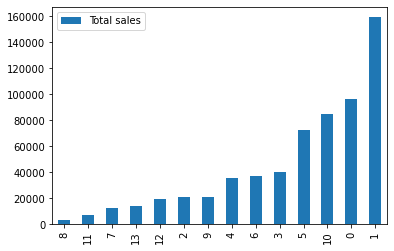

In [57]:
brand_tot_sales.sort_values("Total sales").plot(kind="bar")

Text(0.5, 1.0, 'Total sales by brand')

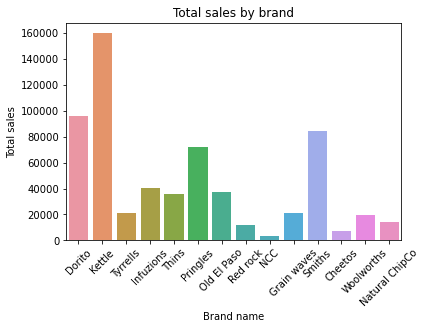

In [58]:
# Creating a plot for total sales by brand
sns.barplot(data= brand_tot_sales, x="Brand name", y="Total sales")
plt.xticks(rotation=45)
plt.title("Total sales by brand")

From the graph above, we can see that Kettle has the highest sales, with Dorito in the second place, and Smiths in the third.

In [59]:
# Transforming date to a datetime object
merged["DATE"]= pd.to_datetime(merged["DATE"], unit = 'D', origin=pd.Timestamp("30-12-1899"))

In [60]:
# Checking the result
merged

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,product_size,product_name,price/chip,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,2,6.0,175,Natural Chip Compny SeaSalt,3.00,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,3,6.3,175,CCs Nacho Cheese,2.10,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,2,2.9,170,Smiths Crinkle Cut Chips Chicken,1.45,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,5,15.0,175,Smiths Chip Thinly S/Cream&Onion,3.00,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,3,13.8,150,Kettle Tortilla ChpsHny&Jlpno Chili,4.60,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
106818,2018-07-22,77,77238,75162,56,1,2.1,125,Cheezels Cheese Box,2.10,YOUNG SINGLES/COUPLES,Premium
106819,2018-09-28,77,77130,75055,83,2,3.8,200,WW D/Style Chip Sea Salt,1.90,YOUNG SINGLES/COUPLES,Premium
106820,2018-09-18,77,77099,75018,64,2,5.4,150,Red Rock Deli SR Salsa & Mzzrlla,2.70,YOUNG SINGLES/COUPLES,Premium
106821,2018-07-29,77,77238,75163,13,2,5.4,150,Red Rock Deli Thai Chilli&Lime,2.70,YOUNG SINGLES/COUPLES,Premium


In [76]:
# Creating a new month colum
merged["date_month"] = merged["DATE"].dt.month

# Creating a new year month column
merged["date_year"] = merged["DATE"].dt.year

In [65]:
# Looking at total sales grouped by month
monthly_sales = merged.groupby("date_month")["TOT_SALES"].sum()

monthly_sales.sort_values()

date_month
2     60437.7
5     63926.6
8     64241.6
11    64338.1
6     64875.1
4     64883.2
9     66183.3
10    66402.9
3     66565.8
1     66623.1
7     67125.4
12    67463.2
Name: TOT_SALES, dtype: float64

From the table above, we can see how the sales are the highest in December, followed by July and January. On the other hand, after January, there is a steep drop in sales in February.

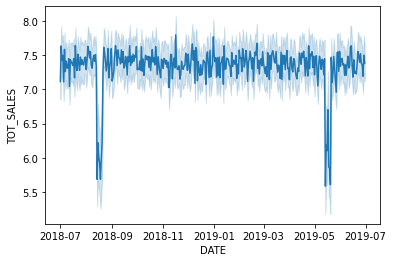

In [63]:
sales_time = sns.lineplot(data=merged, x="DATE", y="TOT_SALES")

In the graph above we can notice a drop in sales in 08/2018 and 06/2019.

# To conclude
The highest grossing brand is Kettle. Most common customers are older people (OLDER SINGLES/COUPLES, OLDER FAMILIES, RETIREES), and they also have the highest average/mean total sales. Considering the customer rating, the customers that are in the "Mainstream" class spend the highest amount per/chip (3.877184 VS 3.804 and 3.807, P<0.05)

# Part 2, store trial which was performed in stores 77, 86 and 88

The trial period was from Feb 2019 to the end of April 2019.

In [73]:
# Checking the max and min store number
print(merged["STORE_NBR"].max())

print(merged["STORE_NBR"].min())

155
1


In [83]:
# Subsetting store num 77
store_77 = merged[merged["STORE_NBR"] == 77]

store_77

# Finding store sales where the time period was Feb-April 2019
store_77_exp = store_77[(store_77["date_year"] == 2019) & (store_77["date_month"] == 2) | (store_77["date_month"] == 3)
                       | (store_77["date_month"] == 4)]

5.250000000000002
777.0
148


<AxesSubplot:xlabel='date_month'>

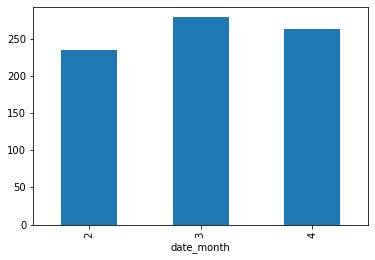

In [100]:
# Finding the mean sales in our time period for store 77
print(store_77_exp["TOT_SALES"].mean())

# Finding total sales in our time period
summed_sales_month = store_77_exp.groupby("date_month")["TOT_SALES"].sum()
print(store_77_exp["TOT_SALES"].sum())

# Finding the customer count in our time period
print(store_77_exp["LYLTY_CARD_NBR"].value_counts().sum())

# Visualising sales in these three months
summed_sales_month.plot(kind="bar")

In [102]:
mean_per_customer = store_77_exp.groupby("LYLTY_CARD_NBR")["PROD_QTY"].mean()

mean_per_customer.mean()

1.5887096774193548

In [103]:
# Creating a function for store analysis
def store_analysis(num):
    """num = store number"""
    store = merged[merged["STORE_NBR"] == num]
    store_exp = store[(store["date_year"] == 2019) & (store["date_month"] == 2) | (store["date_month"] == 3)
                       | (store["date_month"] == 4)]
    print(store_exp["TOT_SALES"].mean())
    print(store_exp["TOT_SALES"].sum())
    print(store_exp["LYLTY_CARD_NBR"].value_counts().sum())
    summed_sales_mon = store_exp.groupby("date_month")["TOT_SALES"].sum()
    summed_sales_month.plot(kind="bar")

6.85103092783506
2658.2
388


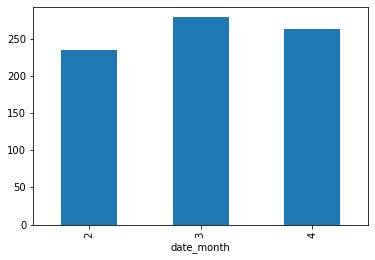

In [104]:
store_analysis(86)

8.820576131687243
4286.800000000001
486


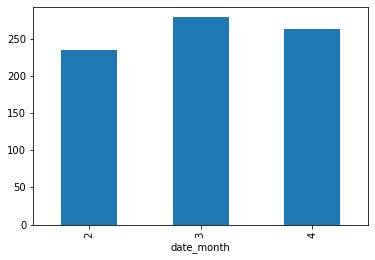

In [105]:
store_analysis(88)

In [107]:
merged

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,product_size,product_name,price/chip,LIFESTAGE,PREMIUM_CUSTOMER,date_month,date_year
0,2018-10-17,1,1000,1,5,2,6.0,175,Natural Chip Compny SeaSalt,3.00,YOUNG SINGLES/COUPLES,Premium,10,2018
1,2019-05-14,1,1307,348,66,3,6.3,175,CCs Nacho Cheese,2.10,MIDAGE SINGLES/COUPLES,Budget,5,2019
2,2019-05-20,1,1343,383,61,2,2.9,170,Smiths Crinkle Cut Chips Chicken,1.45,MIDAGE SINGLES/COUPLES,Budget,5,2019
3,2018-08-17,2,2373,974,69,5,15.0,175,Smiths Chip Thinly S/Cream&Onion,3.00,MIDAGE SINGLES/COUPLES,Budget,8,2018
4,2018-08-18,2,2426,1038,108,3,13.8,150,Kettle Tortilla ChpsHny&Jlpno Chili,4.60,MIDAGE SINGLES/COUPLES,Budget,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106818,2018-07-22,77,77238,75162,56,1,2.1,125,Cheezels Cheese Box,2.10,YOUNG SINGLES/COUPLES,Premium,7,2018
106819,2018-09-28,77,77130,75055,83,2,3.8,200,WW D/Style Chip Sea Salt,1.90,YOUNG SINGLES/COUPLES,Premium,9,2018
106820,2018-09-18,77,77099,75018,64,2,5.4,150,Red Rock Deli SR Salsa & Mzzrlla,2.70,YOUNG SINGLES/COUPLES,Premium,9,2018
106821,2018-07-29,77,77238,75163,13,2,5.4,150,Red Rock Deli Thai Chilli&Lime,2.70,YOUNG SINGLES/COUPLES,Premium,7,2018


In [121]:
pre_test = merged[merged["date_year"]==2018]

pre_test_mean = pre_test.groupby("STORE_NBR")["TOT_SALES"].mean()

pre_test_mean[(pre_test_mean > 8.6)]

pre_test_sum = pre_test.groupby("STORE_NBR")["TOT_SALES"].sum()
pre_test_sum[(pre_test_sum > 7900)]

STORE_NBR
58    7912.35
88    8001.00
Name: TOT_SALES, dtype: float64

In [119]:
pre_test_88 = merged[(merged["date_year"]==2018) & (merged["STORE_NBR"] ==88) ]

pre_test_88["TOT_SALES"].mean()

# Stores num 12 and 60 are the most simmilar to num 88 in terms of mean total sales. Store 58 is the most simmilar in terms of 
# total sales.

pre_test_88["TOT_SALES"].sum()

8001.0

In [127]:
# Creating a year-month column
merged["YEARMONTH"] = merged["DATE"].dt.strftime("%Y%m").astype("int")

In [128]:
merged

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,product_size,product_name,price/chip,LIFESTAGE,PREMIUM_CUSTOMER,date_month,date_year,YEARMONTH
0,2018-10-17,1,1000,1,5,2,6.0,175,Natural Chip Compny SeaSalt,3.00,YOUNG SINGLES/COUPLES,Premium,10,2018,201810
1,2019-05-14,1,1307,348,66,3,6.3,175,CCs Nacho Cheese,2.10,MIDAGE SINGLES/COUPLES,Budget,5,2019,201905
2,2019-05-20,1,1343,383,61,2,2.9,170,Smiths Crinkle Cut Chips Chicken,1.45,MIDAGE SINGLES/COUPLES,Budget,5,2019,201905
3,2018-08-17,2,2373,974,69,5,15.0,175,Smiths Chip Thinly S/Cream&Onion,3.00,MIDAGE SINGLES/COUPLES,Budget,8,2018,201808
4,2018-08-18,2,2426,1038,108,3,13.8,150,Kettle Tortilla ChpsHny&Jlpno Chili,4.60,MIDAGE SINGLES/COUPLES,Budget,8,2018,201808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106818,2018-07-22,77,77238,75162,56,1,2.1,125,Cheezels Cheese Box,2.10,YOUNG SINGLES/COUPLES,Premium,7,2018,201807
106819,2018-09-28,77,77130,75055,83,2,3.8,200,WW D/Style Chip Sea Salt,1.90,YOUNG SINGLES/COUPLES,Premium,9,2018,201809
106820,2018-09-18,77,77099,75018,64,2,5.4,150,Red Rock Deli SR Salsa & Mzzrlla,2.70,YOUNG SINGLES/COUPLES,Premium,9,2018,201809
106821,2018-07-29,77,77238,75163,13,2,5.4,150,Red Rock Deli Thai Chilli&Lime,2.70,YOUNG SINGLES/COUPLES,Premium,7,2018,201807


In [131]:
store_group_ym = merged.groupby(["STORE_NBR", "YEARMONTH"])

store_group_ym.size()

STORE_NBR  YEARMONTH
1          201807       52
           201808       43
           201809       62
           201810       45
           201811       47
                        ..
107        201903       57
           201904       70
           201905       59
           201906       49
155        201906        2
Length: 1231, dtype: int64

In [134]:
# Saving merged to csv
merged.to_csv('Merged_QVI.csv', sep =',')